<b> This code is designed to create plots of precipitaiton with respect to ELI for any given location across the globe </b> /

In [1]:
import numpy as np  
from sklearn.linear_model import LinearRegression
import xarray as xr
from metpy.constants import g, omega as om, Re as a
from metpy.units import units

# import for plots
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
%matplotlib inline

import metpy.calc as mpcalc
from metpy.units import units
from netCDF4 import num2date

# Southeastern Asia Lat and Lon 
# (-16°S - 20°N) and (95°E - 145°E)

<b> Pull Historical ELI Model data </b>

In [2]:
# Upload ELI data for MPI - Historical
dir = '/chinook/dallmann/MPI_SST/'
fn_MPI_his = 'ELI_MPI_1950-2014.nc'

data_mpi_his = xr.open_dataset(dir+fn_MPI_his)

data_mpi_his

<xarray.Dataset>
Dimensions:  (time: 780)
Coordinates:
  * time     (time) datetime64[ns] 1950-01-16T12:00:00 ... 2014-12-16T12:00:00
Data variables:
    eli      (time) float64 ...

In [3]:
# Arrange the data into DJF

eli_mpi_DJF_his = data_mpi_his.where(data_mpi_his['time.season'] == 'DJF',drop = True)

eli_mpi_DJF_his['eli'].values

nyears =  65

eli_djf_mpi_his= np.zeros((nyears))

counter = 0 
for jj in range (0,nyears,1): 
    eli_djf_mpi_his[jj] = eli_mpi_DJF_his['eli'][counter:counter+3].mean()
    counter = counter + 3
    
eli_djf_mpi_his

array([160.29656649, 159.55479988, 165.84269599, 165.02325027,
       164.34197694, 174.98717892, 169.98756442, 162.47868277,
       158.01484408, 160.12649079, 171.0381994 , 167.01675957,
       160.13143727, 162.86821266, 164.33712395, 167.28469251,
       162.81173247, 155.59395068, 164.11947063, 164.43545784,
       161.47237414, 166.4131382 , 166.16410233, 162.20945989,
       165.10223138, 167.55962446, 162.69507584, 158.63993457,
       159.6669481 , 167.33385641, 170.35695045, 168.43907655,
       171.81454524, 170.83922221, 166.05252689, 161.47192243,
       161.92618735, 156.80737426, 161.97736012, 164.28792664,
       171.65892621, 162.49400029, 165.57158632, 177.38178243,
       172.93429777, 165.78198291, 159.14665628, 159.65906984,
       163.40446257, 165.57977788, 161.18771505, 166.33492981,
       164.54461499, 161.36544238, 160.72245137, 168.322077  ,
       168.55526114, 161.7727766 , 164.4038671 , 165.07421056,
       170.03322587, 172.91115102, 166.11769045, 167.50

In [4]:
# Upload ELI data for HAD - Historical
dir = '/chinook/dallmann/HAD_SST/'
fn_HAD_his = 'ELI_HAD_1950-2014.nc'

data_had_his = xr.open_dataset(dir+fn_HAD_his)
data_had_his

<xarray.Dataset>
Dimensions:  (time: 780)
Coordinates:
  * time     (time) object 1950-01-16 00:00:00 ... 2014-12-16 00:00:00
Data variables:
    eli      (time) float64 ...

In [5]:
# Arrange the data into DJF

eli_had_DJF_his = data_had_his.where(data_had_his['time.season'] == 'DJF',drop = True)

eli_had_DJF_his['eli'].values

nyears =  65

eli_djf_had_his= np.zeros((nyears))

counter = 0 
for jj in range (0,nyears,1): 
    eli_djf_had_his[jj] = eli_had_DJF_his['eli'][counter:counter+3].mean()
    counter = counter + 3
    
eli_djf_had_his

array([162.64660116, 166.35015454, 172.23753911, 166.73605722,
       163.74508703, 167.0402738 , 179.18468677, 182.03755811,
       172.2971909 , 173.49082489, 168.07964524, 167.07461156,
       170.49005668, 167.59615707, 172.84687485, 180.76857933,
       167.26326023, 169.86406968, 175.2530354 , 177.3969122 ,
       163.77881406, 170.00529409, 175.89643675, 175.41890148,
       188.91550363, 162.71611237, 169.28146605, 177.40830513,
       177.92790229, 177.80805722, 181.30355039, 165.35890695,
       165.37228779, 168.44126759, 184.77337995, 164.71376586,
       174.98061424, 193.24718137, 175.79429318, 180.45065625,
       165.508985  , 169.1594403 , 170.75797451, 174.73323476,
       168.0670471 , 167.37333393, 169.19588826, 170.55463585,
       162.13194649, 164.6071302 , 168.68128805, 179.00546263,
       192.96819789, 166.94296854, 168.4440028 , 173.4053587 ,
       186.02721034, 169.4820727 , 169.81054623, 171.58201359,
       163.33307416, 170.80493887, 188.46926377, 170.81

<b> Upload ELI Observations </b> 

In [6]:
# Upload Observational data for SSTs - Historical
dir = '/chinook/dallmann/SST/'
fn_ob = 'ELI_ERSSTv5_1854.01-2020.05.nc'

data_ob = xr.open_dataset(dir+fn_ob)

In [7]:
# Arrange the data into DJF

eli_ob_DJF = data_ob.where(data_ob['time.season'] == 'DJF',drop = True)

eli_ob_DJF['nino'].values

nyears =  65

eli_djf_ob = np.zeros((nyears))

counter = 0 
for jj in range (0,nyears,1): 
    eli_djf_ob[jj] = eli_ob_DJF['nino'][counter:counter+3].mean()
    counter = counter + 3

<b> Upload ELI Simulation data for both Models </b> 

In [8]:
# Upload ELI data for MPI - Simulation
dir = '/chinook/dallmann/MPI_SST/'
fn_MPI_sim = 'ELI_MPI_2020-2064.nc'

data_mpi_sim = xr.open_dataset(dir+fn_MPI_sim)

In [9]:
eli_mpi_DJF_sim = data_mpi_sim.where(data_mpi_sim['time.season'] == 'DJF',drop = True)

eli_mpi_DJF_sim['eli'].values

nyears =  45

eli_djf_mpi_sim= np.zeros((nyears))

counter = 0 
for jj in range (0,nyears,1): 
    eli_djf_mpi_sim[jj] = eli_mpi_DJF_sim['eli'][counter:counter+3].mean()
    counter = counter + 3

In [10]:
# Upload ELI data for HAD - Simulation
dir = '/chinook/dallmann/HAD_SST/'
fn_HAD_sim = 'ELI_HAD_2020-2064.nc'

data_had_sim = xr.open_dataset(dir+fn_HAD_sim)

In [11]:
# Arrange the data into DJF

eli_had_DJF_sim = data_had_his.where(data_had_his['time.season'] == 'DJF',drop = True)

eli_had_DJF_sim['eli'].values

nyears =  45

eli_djf_had_sim= np.zeros((nyears))

counter = 0 
for jj in range (0,nyears,1): 
    eli_djf_had_sim[jj] = eli_had_DJF_sim['eli'][counter:counter+3].mean()
    counter = counter + 3

<b> Upload historical precipitation data </b> 

In [12]:
#Upload MPI DJF mean prcipitaiton data from the chinook directory
dir = '/chinook/dallmann/MPI/precip/'
fn_mpip = 'pr_MPI_1950-2014_DJFmean.nc'

data_mpi_pr_his = xr.open_dataset(dir+fn_mpip)

# Parse using MetPy, this allows us to use MetPy operations on it
data_mpi_pr_his = data_mpi_pr_his.metpy.parse_cf()

Found valid latitude/longitude coordinates, assuming latitude_longitude for projection grid_mapping variable


In [13]:
# Upload HAD DJF mean precipiation data from the chinook directory

dir = '/chinook/dallmann/HAD/precip/'
fn_hadp = 'HAD_precip_1950-2014_DJFmean.nc'


data_had_pr_his = xr.open_dataset(dir+fn_hadp)

# Parse using MetPy, so we can use MetPy operations with it
data_had_pr_his = data_had_pr_his.metpy.parse_cf()

Found valid latitude/longitude coordinates, assuming latitude_longitude for projection grid_mapping variable


In [14]:
# Upload Observational DJF mean precipitiaon data from the chinook directory
dir = '/chinook/dallmann/Ob_data/Ob_data/'
fn_obp = 'precip.V1.0.mon.meanDJF.nc'

data_ob_pr = xr.open_dataset(dir+fn_obp)

# Parse using MetPy, this allows us to use MetPy operations on it
data_ob_pr = data_ob_pr.metpy.parse_cf()

Found valid latitude/longitude coordinates, assuming latitude_longitude for projection grid_mapping variable


<b> Upload Simulation Precipitation data </b> 

In [15]:
#Upload MPI DJF mean prcipitaiton data from the chinook directory - Simulation
dir = '/chinook/dallmann/Simulation/MPI/precip/'
fn_mpip_sim = 'pr_MPI_2020-2064_DJFmean.nc'

data_mpi_pr_sim = xr.open_dataset(dir+fn_mpip_sim)

# Parse using MetPy, this allows us to use MetPy operations on it
data_mpi_pr_sim = data_mpi_pr_sim.metpy.parse_cf()

Found valid latitude/longitude coordinates, assuming latitude_longitude for projection grid_mapping variable


In [16]:
# Upload HAD DJF mean precipiation data from the chinook directory - Simulation

dir = '/chinook/dallmann/Simulation/HAD/precip/'
fn_hadp_sim = 'pr_HAD_2015-2069_DJFmean.nc'


data_had_pr_sim = xr.open_dataset(dir+fn_hadp_sim)

# Parse using MetPy, so we can use MetPy operations with it
data_had_pr_sim = data_had_pr_sim.metpy.parse_cf()

Found valid latitude/longitude coordinates, assuming latitude_longitude for projection grid_mapping variable


In [17]:
# Adjust the time series for the HAD - Historical 

data_had_pm_his_new = data_had_pr_his
data_had_pm_his_new['time'] = data_had_pr_his.indexes['time'].to_datetimeindex(unsafe=True)

# Adjust the time series for the HAD - Simulation

data_had_pm_sim_new = data_had_pr_sim
data_had_pm_sim_new['time'] = data_had_pr_sim.indexes['time'].to_datetimeindex(unsafe=True)

In [18]:
# Assign Variables for Time and Precipiation

#MPI-his
time_mpi_pr_his = data_mpi_pr_his['time']
lat_mpi_pr_his = data_mpi_pr_his['lat']
lon_mpi_pr_his = data_mpi_pr_his['lon']
pr_mpi_his = data_mpi_pr_his['pr']

#HAD-his
time_had_pr_his = data_had_pr_his['time']
lat_had_pr_his = data_had_pr_his['lat']
lon_had_pr_his = data_had_pr_his['lon']
pr_had_his = data_had_pr_his['pr']

#Observations
time_ob_pr = data_ob_pr['time']
lat_ob_pr = data_ob_pr['lat']
lon_ob_pr = data_ob_pr['lon']
pr_ob = data_ob_pr['precip']

#MPI-sim
time_mpi_pr_sim = data_mpi_pr_sim['time']
lat_mpi_pr_sim = data_mpi_pr_sim['lat']
lon_mpi_pr_sim = data_mpi_pr_sim['lon']
pr_mpi_sim = data_mpi_pr_sim['pr']

#HAD-sim
time_had_pr_sim = data_had_pr_sim['time']
lat_had_pr_sim = data_had_pr_sim['lat']
lon_had_pr_sim = data_had_pr_sim['lon']
pr_had_sim = data_had_pr_sim['pr']

In [19]:
# Calculate the precipitation in mm/month

pr_mpi_unit_his = pr_mpi_his*86400*31
pr_had_unit_his = pr_had_his*86400*31
pr_ob_unit = pr_ob*31
pr_mpi_unit_sim = pr_mpi_sim*86400*31
pr_had_unit_sim = pr_had_sim*86400*31

<b> Slice the data to only represent southeastern Asia </b> 

In [20]:
#Plot
pr_mpi_plot_his = pr_mpi_unit_his.sel(lat=slice(-16, 20), lon=slice(95,145)).mean(dim=['lat','lon'])
pr_had_plot_his = pr_had_unit_his.sel(lat=slice(-16, 20), lon=slice(95,145)).mean(dim=['lat','lon'])
pr_ob_plot = pr_ob_unit.sel(lat=slice(-16, 20), lon=slice(95,145)).mean(dim=['lat','lon'])
pr_mpi_plot_sim = pr_mpi_unit_sim.sel(lat=slice(-16, 20), lon=slice(95,145)).mean(dim=['lat','lon'])
pr_had_plot_sim = pr_had_unit_sim.sel(lat=slice(-16, 20), lon=slice(95,145)).mean(dim=['lat','lon'])

# Must remove a variable since the dimensions of Precip is too large
# I removed the "0" variable 
pr_mpi_plot_his_removed = np.delete(pr_mpi_plot_his, 0)
pr_had_plot_his_removed = np.delete(pr_had_plot_his, 0)
pr_ob_plot_removed = np.delete(pr_ob_plot,[0, 1, 65, 66, 67])
pr_had_plot_sim_removed = np.delete(pr_had_plot_sim,[0, 1, 2, 3, 4, 50, 51, 52, 53, 54])

<b> Design a scatter plot of DJF precipitation over southeast Asia with respect to ELI </b> 

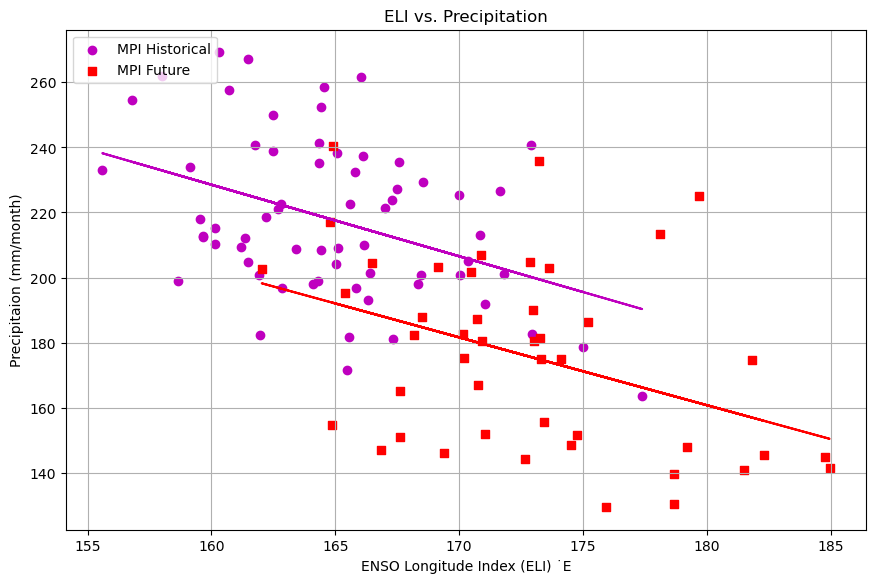

In [29]:
fig = plt.figure(figsize=(8,5), dpi=100)
ax=fig.add_axes([0,0,1,1])
ax.scatter(eli_djf_mpi_his, pr_mpi_plot_his_removed, marker='o', color='m', label= 'MPI Historical')

# ax.scatter(eli_djf_ob, pr_ob_plot_removed, color='k', label= 'Observations')

ax.scatter(eli_djf_mpi_sim, pr_mpi_plot_sim, marker='s', color='r', label= 'MPI Future')

ax.set_xlabel('ENSO Longitude Index (ELI) ˙E')
ax.set_ylabel('Precipitaion (mm/month)')
ax.set_title('ELI vs. Precipitation')
ax.legend(loc="upper left")
plt.grid(True)

# El NIno
#ax.axvspan(179,195, alpha=0.2, color='red')
#ax.axvspan(170,179, alpha=0.15, color='red')
#ax.axvspan(162,170, alpha=0.1, color='red')

# La Nina
#ax.axvspan(155,158, alpha=0.1, color='blue')
#ax.axvspan(152,155, alpha=0.15, color='blue')
#ax.axvspan(145, 152, alpha=0.2, color='blue')

# Historical Linear Regression Line
m, b = np.polyfit(eli_djf_mpi_his, pr_mpi_plot_his_removed, 1)

plt.plot(eli_djf_mpi_his, m*eli_djf_mpi_his + b, color='m') 

#Future linear regression line

x, y = np.polyfit(eli_djf_mpi_sim, pr_mpi_plot_sim, 1)

plt.plot(eli_djf_mpi_sim, x*eli_djf_mpi_sim + y, color='r') 


plt.show()

In [30]:
print(m)
print(x)

-2.1988612348345318
-2.085339178564091


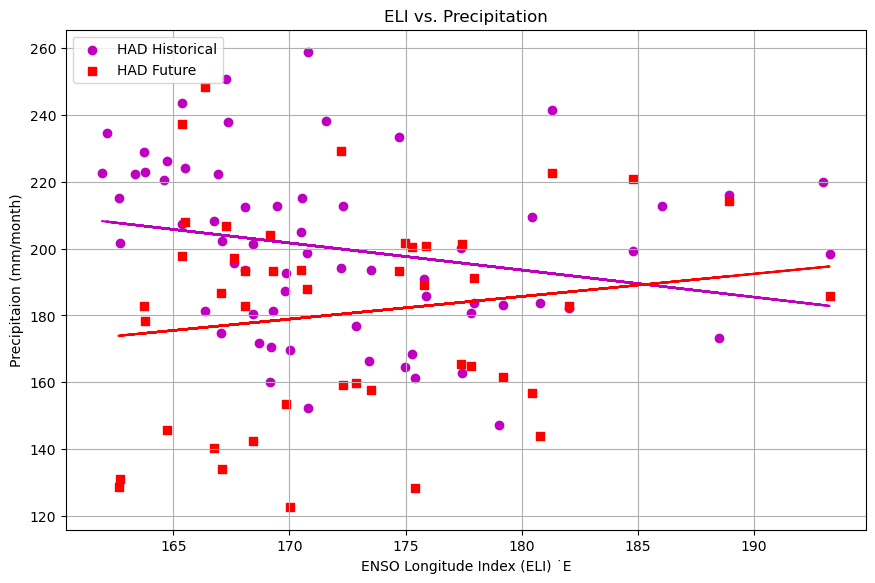

In [31]:
fig = plt.figure(figsize=(8,5), dpi=100)
ax=fig.add_axes([0,0,1,1])
ax.scatter(eli_djf_had_his, pr_had_plot_his_removed, marker='o', color='m', label= 'HAD Historical')

# ax.scatter(eli_djf_ob, pr_ob_plot_removed, color='k', label= 'Observations')

ax.scatter(eli_djf_had_sim, pr_had_plot_sim_removed, marker='s', color='r', label= 'HAD Future')

ax.set_xlabel('ENSO Longitude Index (ELI) ˙E')
ax.set_ylabel('Precipitaion (mm/month)')
ax.set_title('ELI vs. Precipitation')
ax.legend(loc="upper left")
plt.grid(True)

# El NIno
#ax.axvspan(179,195, alpha=0.2, color='red')
#ax.axvspan(170,179, alpha=0.15, color='red')
#ax.axvspan(162,170, alpha=0.1, color='red')

# La Nina
#ax.axvspan(155,158, alpha=0.1, color='blue')
#ax.axvspan(152,155, alpha=0.15, color='blue')
#ax.axvspan(145, 152, alpha=0.2, color='blue')

# Historical Linear Regression Line
m, b = np.polyfit(eli_djf_had_his, pr_had_plot_his_removed, 1)

plt.plot(eli_djf_had_his, m*eli_djf_had_his + b, color='m') 

#Future linear regression line

x, y = np.polyfit(eli_djf_had_sim, pr_had_plot_sim_removed, 1)

plt.plot(eli_djf_had_sim, x*eli_djf_had_sim + y, color='r') 


plt.show()

In [32]:
print(m)
print(x)

-0.8101298232454828
0.6775040383108641


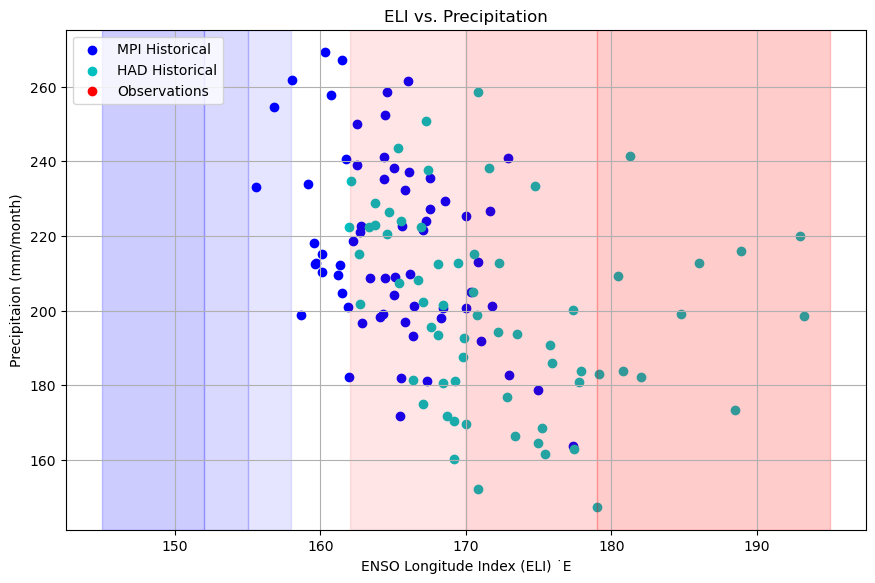

In [22]:
fig = plt.figure(figsize=(8,5), dpi=100)
ax=fig.add_axes([0,0,1,1])
ax.scatter(eli_djf_mpi_his, pr_mpi_plot_his_removed, marker='o', color='b', label= 'MPI Historical')
ax.scatter(eli_djf_had_his, pr_had_plot_his_removed, marker='o', color='c', label= 'HAD Historical')
ax.scatter(eli_djf_ob, pr_ob_plot_removed, color='r', label= 'Observations')

#ax.scatter(eli_djf_mpi_sim, pr_mpi_plot_sim, marker='s', color='c', label= 'MPI Future')

ax.set_xlabel('ENSO Longitude Index (ELI) ˙E')
ax.set_ylabel('Precipitaion (mm/month)')
ax.set_title('ELI vs. Precipitation')
ax.legend(loc="upper left")
plt.grid(True)

# El NIno
ax.axvspan(179,195, alpha=0.2, color='red')
ax.axvspan(170,179, alpha=0.15, color='red')
ax.axvspan(162,170, alpha=0.1, color='red')

# La Nina
ax.axvspan(155,158, alpha=0.1, color='blue')
ax.axvspan(152,155, alpha=0.15, color='blue')
ax.axvspan(145, 152, alpha=0.2, color='blue')

#m, b = np.polyfit(eli_djf_mpi_his, pr_mpi_plot_his_removed, 1)
#plt.plot(eli_djf_mpi_his, m*eli_djf_mpi_his + b)

#m, b = np.polyfit(eli_djf_mpi_sim, pr_mpi_plot_sim, 1)
#plot(eli_djf_mpi_sim, m*eli_djf_mpi_sim + b)

plt.show()